# Object Detection

Using `PyTorch Hub` and *Ultralytics*: https://github.com/ultralytics/yolov5/

## Imports

In [1]:
import cv2
import torch

## Data Preparation

Load Images:

In [8]:
# Images
for f in ['zidane.jpg', 'bus.jpg']:
    torch.hub.download_url_to_file(f'https://ultralytics.com/images/{f}', f'./data/object_detection/{f}')  # download 2 images
img1 = cv2.imread('./data/object_detection/zidane.jpg')  
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('./data/object_detection/bus.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
imgs = [img1, img2]  # batch of images

  0%|          | 0.00/165k [00:00<?, ?B/s]

  0%|          | 0.00/476k [00:00<?, ?B/s]

## Modeling

**Classes for Yolov5:** 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
        'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
        'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
        'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
        'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
        'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
        'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 
        'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 
        'teddy bear', 'hair drier', 'toothbrush'

Load model and inference:

In [9]:
# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Inference
results = model(imgs, size=640)  # includes NMS

Using cache found in /data/ptdata/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-5-10 torch 1.10.2 CUDA:0 (NVIDIA GeForce RTX 3090, 24268MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


## Evaluation

In [10]:
results.print()

image 1/2: 720x1280 2 persons, 2 ties
image 2/2: 1080x810 4 persons, 1 bus
Speed: 1.5ms pre-process, 3.1ms inference, 0.7ms NMS per image at shape (2, 3, 640, 640)


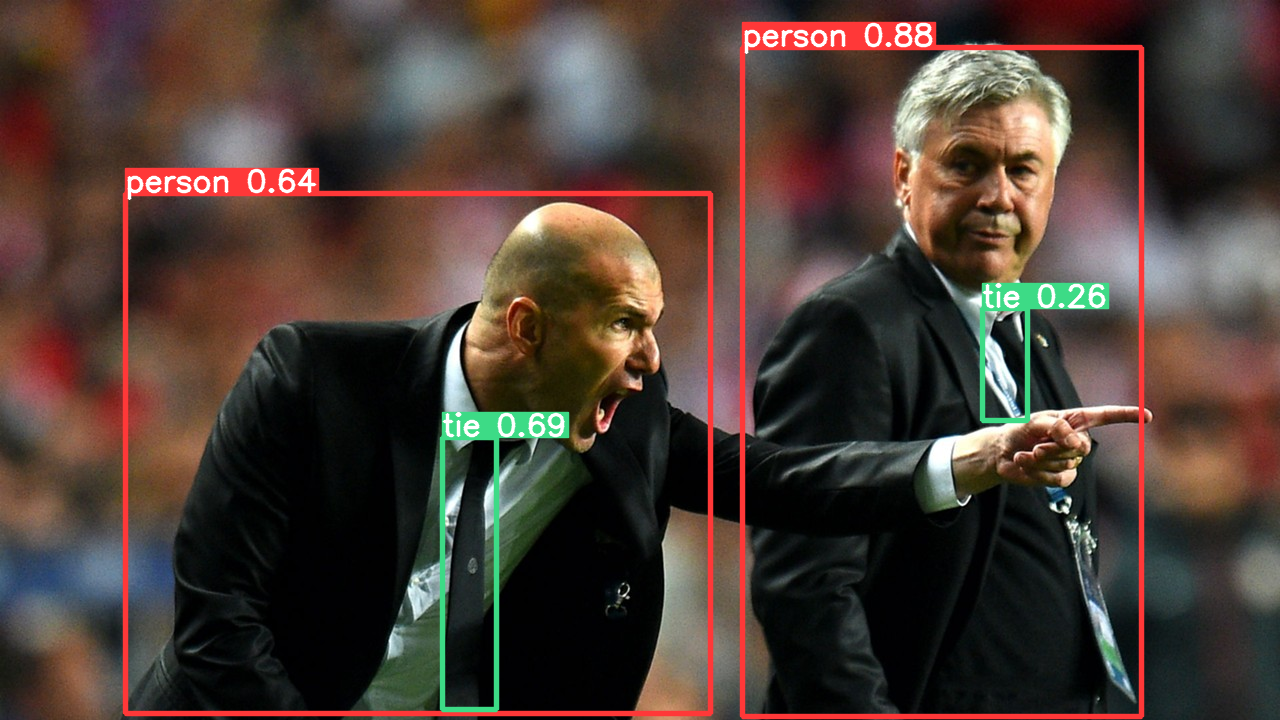

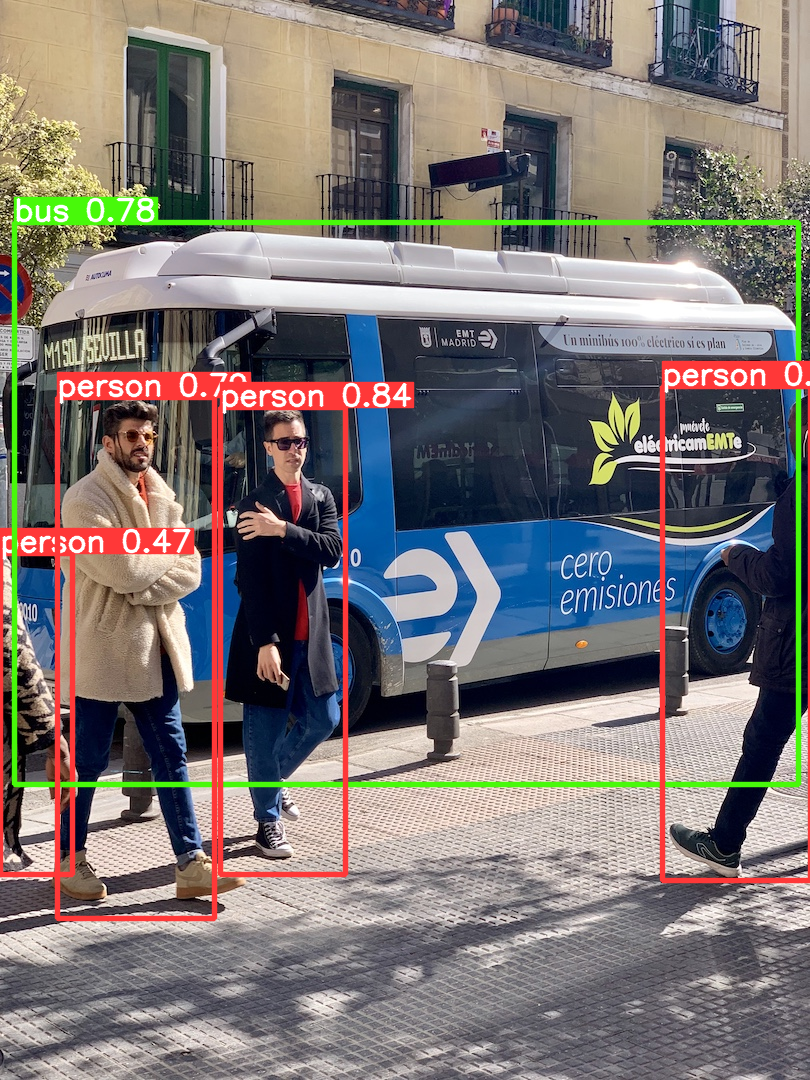

In [5]:
results.save() # Or, if possible .show()

In [6]:
results.xyxy[0]  # img1 predictions (tensor)
results.pandas().xyxy[0]  # img1 predictions (pandas)

,xmin,ymin,xmax,ymax,confidence,class,name
0,742.911865,47.959106,1141.175293,716.862183,0.880727,0,person
1,442.032837,437.317566,496.742859,709.901672,0.687539,27,tie
2,125.110443,193.594086,710.883911,713.026855,0.642385,0,person
3,982.896301,308.416321,1027.323730,420.223328,0.263604,27,tie
